### Regularization Methods Example 2.4:
We now split the samples of the **Credit** data set into a training set and a test set in order to estimate the test error of ridge regression and the lasso. The splitting can be easily achieved using the **train\_test\_split()** function from **sklearn.model\_selection**. 
We first set a random seed so that the results obtained will be reproducible.

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('./data/Credit.csv', index_col="Unnamed: 0")

# Convert Categorical variables
df = pd.get_dummies(data=df, drop_first=True, 
                    prefix=('Gender_', 'Student_', 
                            'Married_', 'Ethnicity_'))

# Define target and predictors
x = df.drop(columns='Balance') 
y = df['Balance']

# Split in test and train set
np.random.seed(10)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.5)

We now split the samples of the **Credit** data set into a training set and a test set in order to estimate the test error of ridge regression and the lasso. 
The splitting can be easily achieved using the **train\_test\_split()** function from **sklearn.model\_selection**. We first set a random seed so that the results obtained will be reproducible.

In [4]:
import warnings
warnings.filterwarnings("ignore")


# Model for lambda=4
params = pd.DataFrame(columns=x.columns)
lambda_ = 4

# Fit model:
reg = Ridge(alpha=lambda_, normalize=True)
reg = reg.fit(x_train, y_train)

# Coeficient and coresponding predictors
coef = np.round(reg.coef_, 3)
x_cols = x.columns.values

print(pd.DataFrame(data={'Feature': x_cols,
                         'Coefficient':coef}))

# Predict and calculate MSE on test-set
y_pred = reg.predict(x_test)
MSE = np.mean((y_pred - y_test)**2)
print("\nMSE:", np.round(MSE, 1))

                 Feature  Coefficient
0                 Income        0.656
1                  Limit        0.028
2                 Rating        0.418
3                  Cards        4.490
4                    Age       -0.323
5              Education       -0.251
6           Gender__Male       -8.147
7           Student__Yes       99.132
8           Married__Yes        3.622
9       Ethnicity__Asian       -1.485
10  Ethnicity__Caucasian        1.972

MSE: 116077.3


The test MSE is $116077.3$. Note that if we had instead simply fit a model with just an intercept, we would have predicted each test observation using the mean of the training observations. In that case, we could compute the test set MSE like this:

In [5]:
MSE = np.mean((np.mean(y_train) - y_test)**2)
print("MSE:", np.round(MSE, 1))

MSE: 214872.8


We could also get the same result by fitting a ridge regression model with a very large value of $\lambda$. 

In [6]:
# Model for lambda=inf
lambda_ = 1e10

# Fit model:
reg = Ridge(alpha=lambda_, normalize=True)
reg = reg.fit(x_train, y_train)

# Coeficient and coresponding predictors
coef = np.round(reg.coef_, 3)
x_cols = x.columns.values

print(pd.DataFrame(data={'Feature': x_cols,
                         'Coefficient':coef}))

# Predict and calculate MSE on test-set
y_pred = reg.predict(x_test)
MSE = np.mean((y_pred - y_test)**2)
print("\nMSE:", np.round(MSE, 1))

                 Feature  Coefficient
0                 Income          0.0
1                  Limit          0.0
2                 Rating          0.0
3                  Cards          0.0
4                    Age         -0.0
5              Education         -0.0
6           Gender__Male         -0.0
7           Student__Yes          0.0
8           Married__Yes          0.0
9       Ethnicity__Asian         -0.0
10  Ethnicity__Caucasian          0.0

MSE: 214872.8


So fitting a ridge regression model with $\lambda = 4$ leads to a much lower test MSE than fitting a model with just an intercept. We now check whether there is any benefit to performing ridge regression with $\lambda = 4$ instead of just performing least squares regression. Recall that least squares is simply ridge regression with $\lambda=0$.

In [7]:
# Model for lambda=0
lambda_ = 0

# Fit model:
reg = Ridge(alpha=lambda_, normalize=True)
reg = reg.fit(x_train, y_train)

# Coeficient and coresponding predictors
coef = np.round(reg.coef_, 3)
x_cols = x.columns.values

print(pd.DataFrame(data={'Feature': x_cols,
                         'Coefficient':coef}))

# Predict and calculate MSE on test-set
y_pred = reg.predict(x_test)
MSE = np.mean((y_pred - y_test)**2)
print("\nMSE:", np.round(MSE, 1))

                 Feature  Coefficient
0                 Income       -7.666
1                  Limit        0.168
2                 Rating        1.421
3                  Cards       20.156
4                    Age       -0.333
5              Education        0.942
6           Gender__Male      -13.405
7           Student__Yes      455.791
8           Married__Yes      -10.613
9       Ethnicity__Asian       18.956
10  Ethnicity__Caucasian       27.706

MSE: 10730.6


The MSE resulting form Ridge regression with $\lambda=4$ is larger than the MSE resulting from least squares which is not surprising since we have arbitrarily chosen $\lambda=4$.

In general, instead of arbitrarily choosing $\lambda=4$, it would be better to use cross-validation to choose the tuning parameter $\lambda$.

### Regularization Methods Example 2.5:
We can do this using the **RidgeCV()** function. By default, the number of folds equals the number of observations (*leave-one-out*), but this can be changed using the **cv** setting. 

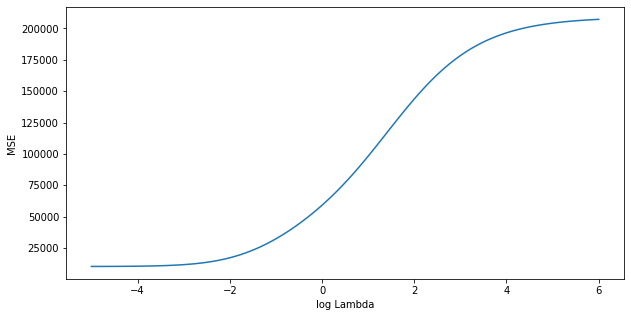

In [8]:
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt

n=100
lambda_ = np.exp(np.linspace(-5, 6, n))

# Fit model:
reg = RidgeCV(alphas=lambda_, store_cv_values=True, normalize=True)
reg = reg.fit(x_train, y_train)

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.log(lambda_), np.mean(reg.cv_values_, axis=0))
plt.xlabel("log Lambda")
plt.ylabel("MSE")
plt.show()

In [9]:
print("Best Lambda:", np.round(reg.alpha_, 3))

Best Lambda: 0.007


Therefore, we see that the value of $\lambda$ that results in the smallest cross-validation error is $0.007$. What is the test MSE associated with this value of
$\lambda$?


In [10]:
# Predict and calculate MSE on test-set
y_pred = reg.predict(x_test)
MSE = np.mean((y_pred - y_test)**2)
print("MSE:", np.round(MSE, 1))

MSE: 10894.1


Note that the best model is already returned by **RidgeCV**, we dont need to fit it again. The test MSE does represent an improvement over the test MSE we got using $\lambda=4$. Now we can also find the coefficients of the model. 

In [11]:
# Coeficient and coresponding predictors
coef = np.round(reg.coef_, 3)
x_cols = x.columns.values

print(pd.DataFrame(data={'Feature': x_cols,
                         'Coefficient':coef}))

                 Feature  Coefficient
0                 Income       -7.406
1                  Limit        0.139
2                 Rating        1.803
3                  Cards       18.373
4                    Age       -0.382
5              Education        0.984
6           Gender__Male      -13.514
7           Student__Yes      451.436
8           Married__Yes      -10.541
9       Ethnicity__Asian       20.025
10  Ethnicity__Caucasian       28.396


### Regularization Methods Example 2.6
We now ask whether the lasso can yield either a more accurate or a more interpretable model than ridge regression.

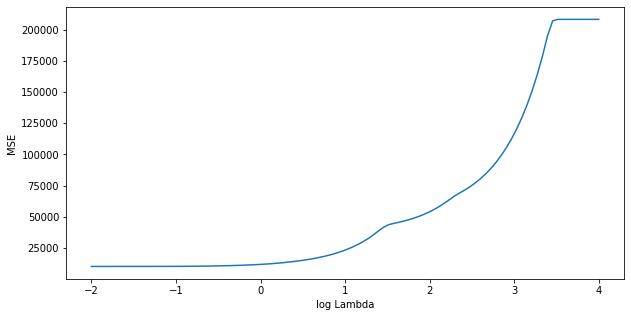

In [12]:
from sklearn.linear_model import LassoCV

lambda_ = np.exp(np.linspace(-2, 4, n))

# Fit model:
reg = LassoCV(alphas=lambda_, normalize=True)
reg = reg.fit(x_train, y_train)

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.log(reg.alphas_), np.mean(reg.mse_path_, axis=1))
plt.xlabel("log Lambda")
plt.ylabel("MSE")
plt.show()

We can see from the coefficient plot that depending on the choice of tuning parameter, some of the coefficients will be exactly equal to zero. We now compute the associated test error.

In [13]:
# Predict and calculate MSE on test-set
y_pred = reg.predict(x_test)
MSE = np.mean((y_pred - y_test)**2)
print("Best Lambda:", np.round(reg.alpha_, 3), "\nMSE:", np.round(MSE, 1))

Best Lambda: 0.135 
MSE: 10538.4


This is substantially lower than the test set MSE of the null model, the test MSE of ridge regression with $\lambda$ chosen by cross-validation, and very similar to least squares. Finally, we will have a look at the corresponding coefficients.

In [14]:
# Coeficient and coresponding predictors
coef = np.round(reg.coef_,  3)
x_cols = x.columns.values

print(pd.DataFrame(data={'Feature': x_cols,
                         'Coefficient':coef}))

                 Feature  Coefficient
0                 Income       -7.410
1                  Limit        0.166
2                 Rating        1.392
3                  Cards       18.422
4                    Age       -0.277
5              Education        0.111
6           Gender__Male       -8.978
7           Student__Yes      448.564
8           Married__Yes       -4.421
9       Ethnicity__Asian        7.698
10  Ethnicity__Caucasian       17.483


In this example, all coefficients are different from zero.